In [1]:
#import packages
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip = 'https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/horse-or-human')
local_zip = 'https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/validation-horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [6]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/horse-or-human/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter13/Dataset/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1687 images belonging to 3 classes.
Found 256 images belonging to 2 classes.


In [7]:
IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [8]:
base_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
average_pool = tf.keras.Sequential()
average_pool.add(layers.AveragePooling2D())
average_pool.add(layers.Flatten())
average_pool.add(layers.Dense(1, activation='sigmoid'))

In [10]:
standard_model = tf.keras.Sequential([base_model, 
    average_pool])

In [11]:
standard_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# import PIL

# print(standard_model)

history = standard_model.fit(
      train_generator,
      steps_per_epoch=7,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator, validation_steps = 3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 3 steps
Epoch 1/5
7/7 [==============================] - 198s 28s/step - loss: -7.2376 - accuracy: 0.2824 - val_loss: 0.9527 - val_accuracy: 0.6979
Epoch 2/5
7/7 [==============================] - 173s 25s/step - loss: -52.4061 - accuracy: 0.2503 - val_loss: 9.1497 - val_accuracy: 0.6146
Epoch 3/5
7/7 [==============================] - 198s 28s/step - loss: -108.4255 - accuracy: 0.2769 - val_loss: 29.4700 - val_accuracy: 0.5208
Epoch 4/5
7/7 [==============================] - 232s 33s/step - loss: -165.7404 - accuracy: 0.3058 - val_loss: 104.7796 - val_accuracy: 0.5312
Epoch 5/5
7/7 [==============================] - 201s 29s/step - loss: -249.9737 - accuracy: 0.2528 - val_loss: 101.1662 - val_accuracy: 0.5208


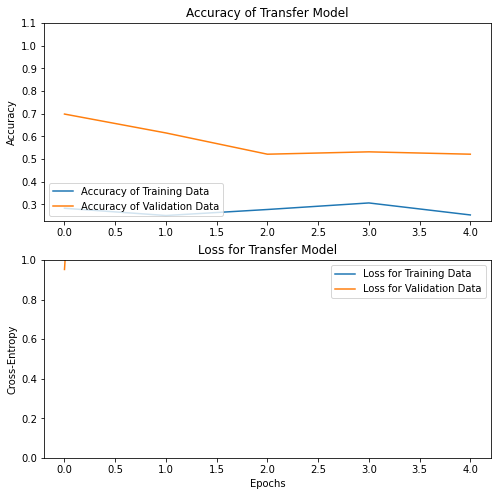

In [13]:
# print(history.history)
a = history.history['accuracy']
v_a = history.history['val_accuracy']

l = history.history['loss']
v_l = history.history['val_loss']



plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(a, label='Accuracy of Training Data ')
plt.plot(v_a, label='Accuracy of Validation Data')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Accuracy of Transfer Model')

plt.subplot(2, 1, 2)
plt.plot(l, label='Loss for Training Data')
plt.plot(v_l, label='Loss for Validation Data')
plt.legend(loc='upper right')
plt.ylabel('Cross-Entropy')
plt.ylim([0,1])
plt.title('Loss for Transfer Model')
plt.xlabel('Epochs')
plt.show()
